# Pymaceuticals Inc.

### Findings:

1. Overall, Capomulin outperformed the placebo and 2 other drugs that were analyzed.
2. Having had the best response to treatment reducing the tumor volume (mm3) from 45 to 40.72, making the tumor 19% smaller in the course of 45 days. It was the only drug that had any positive affect on the tumor.
3. It also was the drug that had the lowest number of metastatic sites, about 1.75 less than placebo and Ketaptil. 
4. Lastly, Capomulin had the highest survival rate of over 80%, whereas the other 2 drugs and the placebo all had survival rates below 50%.


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
total_dataset = clinical_trial_data.merge(mouse_drug_data,on='Mouse ID',how='left')

# Display the data table for preview
total_dataset.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
grouped_volume_mean= pd.DataFrame(total_dataset.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean())
grouped_volume_mean = grouped_volume_mean.reset_index()

# Preview DataFrame
grouped_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_volume_sem = pd.DataFrame(total_dataset.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem())
grouped_volume_sem = grouped_volume_sem.reset_index()

# Preview DataFrame
grouped_volume_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
grouped_volume_mean_mungled = grouped_volume_mean.pivot(index = 'Timepoint', columns ='Drug', 
                                                                values = 'Tumor Volume (mm3)') 

# Preview that Reformatting worked
grouped_volume_mean_mungled.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


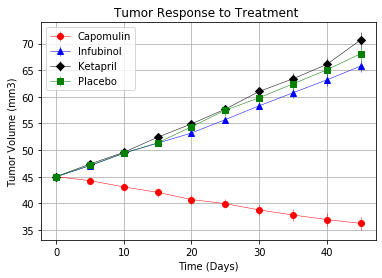

In [5]:
# Generate the Plot (with Error Bars). Treatments (Capomulin, Infubinol, Ketapril, and Placebo)
Capomulin_error = grouped_volume_sem.loc[grouped_volume_sem["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
Infubinol_error = grouped_volume_sem.loc[grouped_volume_sem["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
Ketapril_error = grouped_volume_sem.loc[grouped_volume_sem["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
Placebo_error = grouped_volume_sem.loc[grouped_volume_sem["Drug"] == "Placebo", "Tumor Volume (mm3)"]
Time = grouped_volume_sem['Timepoint'].unique().tolist()

plt.errorbar(Time, grouped_volume_mean_mungled["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", lw = 0.5)
plt.errorbar(Time, grouped_volume_mean_mungled["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue", lw = 0.5)
plt.errorbar(Time, grouped_volume_mean_mungled["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "D", color="black", lw = 0.5)
plt.errorbar(Time, grouped_volume_mean_mungled["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "s", color="green", lw = 0.5)
plt.legend()
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig("Graphs/Tumor_Response.png")

## Metastatic Response to Treatment

In [6]:
total_dataset.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint in Dataframe
grouped_metasites_mean = pd.DataFrame(total_dataset.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean())
grouped_metasites_mean = grouped_metasites_mean.reset_index()

# Preview DataFrame
grouped_metasites_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_metasites_sem = pd.DataFrame(total_dataset.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem())
grouped_metasites_sem = grouped_metasites_sem.reset_index()

# Preview DataFrame
grouped_metasites_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
grouped_metasites_mean_mungled = grouped_metasites_mean.pivot(index = 'Timepoint', columns ='Drug', 
                                                                values = 'Metastatic Sites') 

# Preview that Reformatting worked
grouped_metasites_mean_mungled.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


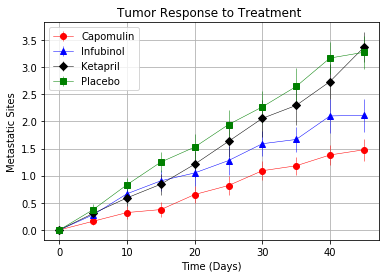

In [10]:
# Generate the Plot (with Error Bars)
Capomulin_error = grouped_metasites_sem.loc[grouped_metasites_sem["Drug"] == "Capomulin", "Metastatic Sites"]
Infubinol_error = grouped_metasites_sem.loc[grouped_metasites_sem["Drug"] == "Infubinol", "Metastatic Sites"]
Ketapril_error = grouped_metasites_sem.loc[grouped_metasites_sem["Drug"] == "Ketapril", "Metastatic Sites"]
Placebo_error = grouped_metasites_sem.loc[grouped_metasites_sem["Drug"] == "Placebo", "Metastatic Sites"]
Time = grouped_metasites_sem['Timepoint'].unique().tolist()

plt.errorbar(Time, grouped_metasites_mean_mungled["Capomulin"] , yerr= Capomulin_error, label= "Capomulin", marker= "o", color="red", lw = 0.5)
plt.errorbar(Time, grouped_metasites_mean_mungled["Infubinol"] , yerr= Infubinol_error, label= "Infubinol", marker= "^", color="blue", lw = 0.5)
plt.errorbar(Time, grouped_metasites_mean_mungled["Ketapril"] , yerr= Ketapril_error, label= "Ketapril", marker= "D", color="black", lw = 0.5)
plt.errorbar(Time, grouped_metasites_mean_mungled["Placebo"] , yerr= Placebo_error , label= "Placebo", marker= "s", color="green", lw = 0.5)
plt.legend()
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()

# Save the Figure
plt.savefig("Graphs/MetaSite_Response.png")

## Survival Rates

In [11]:
total_dataset.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_mouse_count = pd.DataFrame(total_dataset.groupby(['Drug','Timepoint'])['Mouse ID'].count())
grouped_mouse_count = grouped_mouse_count.reset_index()
grouped_mouse_count = grouped_mouse_count.rename(columns = {"Mouse ID" : "Mouse Count"})


# Preview DataFrame
grouped_mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
grouped_mouse_count_mungled = grouped_mouse_count.pivot(index = 'Timepoint', columns ='Drug', 
                                                                values = 'Mouse Count') 

# Preview that Reformatting worked
grouped_mouse_count_mungled.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


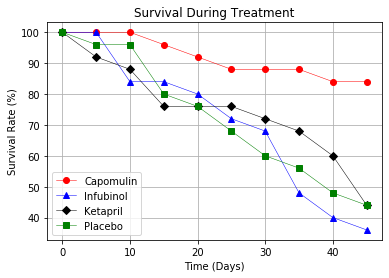

In [14]:
# Generate the Plot (Accounting for percentages)
Capomulin_survival_rate = (grouped_mouse_count_mungled["Capomulin"]/grouped_mouse_count_mungled["Capomulin"][0])*100
Infubinol_survival_rate = (grouped_mouse_count_mungled["Infubinol"]/grouped_mouse_count_mungled["Infubinol"][0])*100
Ketapril_survival_rate = (grouped_mouse_count_mungled["Ketapril"]/grouped_mouse_count_mungled["Ketapril"][0])*100
Placebo_survival_rate = (grouped_mouse_count_mungled["Placebo"]/grouped_mouse_count_mungled["Placebo"][0])*100
Time = grouped_mouse_count['Timepoint'].unique().tolist()

plt.plot(Time, Capomulin_survival_rate, label= "Capomulin", marker= "o", color="red", lw = 0.5)
plt.plot(Time, Infubinol_survival_rate, label= "Infubinol", marker= "^", color="blue", lw = 0.5)
plt.plot(Time, Ketapril_survival_rate, label= "Ketapril", marker= "D", color="black", lw = 0.5)
plt.plot(Time, Placebo_survival_rate, label= "Placebo", marker= "s", color="green", lw = 0.5)

plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# Save the Figure
plt.savefig("Graphs/Mouse_Survival_Rate.png")

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
volume_percent_change = ((grouped_volume_mean_mungled.iloc[-1]-grouped_volume_mean_mungled.iloc[0])/grouped_volume_mean_mungled.iloc[0])*100
# Display the data to confirm
volume_percent_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

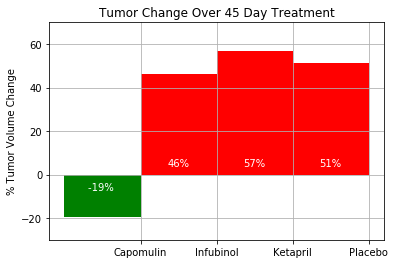

In [16]:
# Store all Relevant Percent Changes into a Tuple
relev_percent_change = (volume_percent_change["Capomulin"],
                        volume_percent_change["Infubinol"],
                        volume_percent_change["Ketapril"],
                        volume_percent_change["Placebo"])
labels = ["Capomulin","Infubinol","Ketapril","Placebo"]

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
index = np.arange(len(relev_percent_change))  
width = 1
Pass_Drugs = ax.bar(index[0], relev_percent_change[0], width, color='green')
Fail_Drugs = ax.bar(index[1:], relev_percent_change[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(index + 0.5)
ax.set_xticklabels(labels)
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def labelFail(items):
    for item in items:
        height = item.get_height()
        ax.text(item.get_x() + item.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def labelPass(items):
    for item in items:
        height = item.get_height()
        ax.text(item.get_x() + item.get_width()/2., -8,
                '%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
labelPass(Pass_Drugs)
labelFail(Fail_Drugs)

# Save the Figure
fig.savefig("Graphs/Summary_Bar_Graph.png")
